<a href="https://colab.research.google.com/github/nan-973/assignment_/blob/main/etl_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-21T15:14:17.414Z,60.904000,-147.602300,23.50,1.10,ml,NaN,NaN,NaN,0.5300,...,2025-07-21T15:18:31.052Z,"50 km W of Tatitlek, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
1,2025-07-21T15:10:57.490Z,35.751833,-118.478667,4.50,0.95,ml,16.0,81.00,0.04320,0.1800,...,2025-07-21T15:18:39.428Z,"5 km W of Kernville, CA",earthquake,0.31,0.480,0.218,10.0,automatic,ci,ci
2,2025-07-21T15:04:09.977Z,62.203300,-153.286900,0.00,1.20,ml,NaN,NaN,NaN,0.8000,...,2025-07-21T15:06:21.038Z,"101 km WNW of Skwentna, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
3,2025-07-21T14:57:32.238Z,60.266600,-151.000300,52.80,2.40,ml,NaN,NaN,NaN,0.4300,...,2025-07-21T14:59:00.644Z,"17 km ESE of Kasilof, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
4,2025-07-21T14:52:20.330Z,35.690167,-117.544667,9.08,0.66,ml,22.0,97.00,0.10160,0.1200,...,2025-07-21T14:55:46.249Z,"14 km ENE of Ridgecrest, CA",earthquake,0.22,0.610,0.165,10.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10926,2025-06-21T15:36:26.163Z,-57.104700,-66.696200,10.00,4.90,mb,65.0,106.00,3.90400,0.8700,...,2025-07-16T16:19:11.040Z,"274 km SSE of Ushuaia, Argentina",earthquake,11.22,1.885,0.075,61.0,reviewed,us,us
10927,2025-06-21T15:30:14.420Z,-6.617100,129.673300,138.85,4.70,mb,20.0,105.00,4.48100,0.9900,...,2025-07-16T15:48:37.040Z,Banda Sea,earthquake,5.47,8.960,0.147,14.0,reviewed,us,us
10928,2025-06-21T15:29:03.670Z,38.843334,-122.856163,5.77,0.50,md,8.0,218.00,0.01683,0.0700,...,2025-06-21T17:12:19.637Z,"11 km NW of The Geysers, CA",earthquake,1.52,2.660,0.170,8.0,automatic,nc,nc
10929,2025-06-21T15:26:26.306Z,38.396500,-117.980900,11.90,1.40,ml,13.0,50.55,0.19800,0.1328,...,2025-06-27T20:19:05.159Z,"11 km E of Mina, Nevada",earthquake,NaN,1.600,0.170,9.0,reviewed,nn,nn


In [22]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,1
magType,1
nst,1799
gap,1800
dmin,1892
rms,1


In [23]:
number_of_records = len(df)
print("Number of Records = ",number_of_records)

df['location'] = df['place'].str.split(',', n=1).str[-1].str.strip()
# splits places into locations as the part after the first comma(n=1) ,str[-1] takes the last part of list and str.strip removes spaces before the list eg: " CA"

unique_locations = df['location'].nunique()
print("Number of Unique Locations = ",unique_locations)

Number of Records =  10931
Number of Unique Locations =  140


In [24]:
rows=df.head()
print("Top 5 rows:",rows)
column_name=df.columns.tolist()
print("Column Names:",column_name)

Top 5 rows:                        time   latitude   longitude  depth   mag magType   nst  \
0  2025-07-21T15:14:17.414Z  60.904000 -147.602300  23.50  1.10      ml   NaN   
1  2025-07-21T15:10:57.490Z  35.751833 -118.478667   4.50  0.95      ml  16.0   
2  2025-07-21T15:04:09.977Z  62.203300 -153.286900   0.00  1.20      ml   NaN   
3  2025-07-21T14:57:32.238Z  60.266600 -151.000300  52.80  2.40      ml   NaN   
4  2025-07-21T14:52:20.330Z  35.690167 -117.544667   9.08  0.66      ml  22.0   

    gap    dmin   rms  ...                           place        type  \
0   NaN     NaN  0.53  ...     50 km W of Tatitlek, Alaska  earthquake   
1  81.0  0.0432  0.18  ...         5 km W of Kernville, CA  earthquake   
2   NaN     NaN  0.80  ...  101 km WNW of Skwentna, Alaska  earthquake   
3   NaN     NaN  0.43  ...    17 km ESE of Kasilof, Alaska  earthquake   
4  97.0  0.1016  0.12  ...     14 km ENE of Ridgecrest, CA  earthquake   

  horizontalError depthError magError  magNst     status

In [25]:
df['time'] = pd.to_datetime(df['time'])
df['time'].head()

,time
0,2025-07-21 15:14:17.414000+00:00
1,2025-07-21 15:10:57.490000+00:00
2,2025-07-21 15:04:09.977000+00:00
3,2025-07-21 14:57:32.238000+00:00
4,2025-07-21 14:52:20.330000+00:00


In [26]:
df=df.dropna(subset=['latitude', 'longitude', 'mag'])

In [27]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,1799
gap,1800
dmin,1892
rms,1


In [28]:
df = df[df['mag'] >= 4.0]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,location
7,2025-07-21 14:37:19.678000+00:00,52.2918,160.6772,10.0,5.0,mb,127.0,146.0,1.436,0.80,...,"163 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,7.46,1.846,0.048,140.0,reviewed,us,us,Russia
9,2025-07-21 14:33:45.006000+00:00,52.8742,160.9097,10.0,5.1,mb,135.0,108.0,1.375,1.13,...,"154 km E of Petropavlovsk-Kamchatsky, Russia",earthquake,7.28,1.828,0.025,505.0,reviewed,us,us,Russia
12,2025-07-21 14:13:36.893000+00:00,10.4348,121.8697,10.0,4.7,mb,68.0,100.0,4.962,0.78,...,"11 km W of Magdalena, Philippines",earthquake,9.66,1.883,0.063,78.0,reviewed,us,us,Philippines
20,2025-07-21 13:46:53.917000+00:00,52.3727,160.5756,10.0,4.6,mb,37.0,122.0,1.341,0.85,...,"152 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,9.19,1.905,0.111,24.0,reviewed,us,us,Russia
26,2025-07-21 13:16:04.736000+00:00,52.7789,160.5531,10.0,4.5,mb,114.0,55.0,1.179,0.70,...,"133 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,7.42,1.723,0.046,140.0,reviewed,us,us,Russia


In [29]:
df['day_of_week'] = df['time'].dt.day_name()
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,location,day_of_week
7,2025-07-21 14:37:19.678000+00:00,52.2918,160.6772,10.0,5.0,mb,127.0,146.0,1.436,0.80,...,earthquake,7.46,1.846,0.048,140.0,reviewed,us,us,Russia,Monday
9,2025-07-21 14:33:45.006000+00:00,52.8742,160.9097,10.0,5.1,mb,135.0,108.0,1.375,1.13,...,earthquake,7.28,1.828,0.025,505.0,reviewed,us,us,Russia,Monday
12,2025-07-21 14:13:36.893000+00:00,10.4348,121.8697,10.0,4.7,mb,68.0,100.0,4.962,0.78,...,earthquake,9.66,1.883,0.063,78.0,reviewed,us,us,Philippines,Monday
20,2025-07-21 13:46:53.917000+00:00,52.3727,160.5756,10.0,4.6,mb,37.0,122.0,1.341,0.85,...,earthquake,9.19,1.905,0.111,24.0,reviewed,us,us,Russia,Monday
26,2025-07-21 13:16:04.736000+00:00,52.7789,160.5531,10.0,4.5,mb,114.0,55.0,1.179,0.70,...,earthquake,7.42,1.723,0.046,140.0,reviewed,us,us,Russia,Monday


In [30]:
def classify_severity(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"

df['severity_level'] = df['mag'].apply(classify_severity)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,location,day_of_week,severity_level
7,2025-07-21 14:37:19.678000+00:00,52.2918,160.6772,10.0,5.0,mb,127.0,146.0,1.436,0.80,...,7.46,1.846,0.048,140.0,reviewed,us,us,Russia,Monday,Moderate
9,2025-07-21 14:33:45.006000+00:00,52.8742,160.9097,10.0,5.1,mb,135.0,108.0,1.375,1.13,...,7.28,1.828,0.025,505.0,reviewed,us,us,Russia,Monday,Moderate
12,2025-07-21 14:13:36.893000+00:00,10.4348,121.8697,10.0,4.7,mb,68.0,100.0,4.962,0.78,...,9.66,1.883,0.063,78.0,reviewed,us,us,Philippines,Monday,Moderate
20,2025-07-21 13:46:53.917000+00:00,52.3727,160.5756,10.0,4.6,mb,37.0,122.0,1.341,0.85,...,9.19,1.905,0.111,24.0,reviewed,us,us,Russia,Monday,Moderate
26,2025-07-21 13:16:04.736000+00:00,52.7789,160.5531,10.0,4.5,mb,114.0,55.0,1.179,0.70,...,7.42,1.723,0.046,140.0,reviewed,us,us,Russia,Monday,Moderate


In [31]:
earthquakes_per_place=df['place'].value_counts()
earthquakes_per_place.head()

,count
place,
south of the Fiji Islands,24
central Mid-Atlantic Ridge,19
Fiji region,17
South Sandwich Islands region,11
Carlsberg Ridge,11


In [34]:
# Creating a new column with just the date
df['date'] = df['time'].dt.date

# Grouping by that new column
grouped = df.groupby('date')

# Calculating average magnitude and max depth and renaming the columns
summary = grouped.agg({
    'mag': 'mean',
    'depth': 'max'
}).rename(columns={
    'mag': 'avg_magnitude',
    'depth': 'max_depth'
})

summary.head()

,avg_magnitude,max_depth
date,,
2025-06-21,4.793333,138.850
2025-06-22,4.424528,606.970
2025-06-23,4.463830,583.264
2025-06-24,4.517846,604.943
2025-06-25,4.575152,596.789


In [33]:
df.to_csv("cleaned_earthquakes.csv",index=False)
summary.to_csv("earthquake_summary.csv")

In [36]:
import sqlite3

conn = sqlite3.connect('earthquakes.db')
df.to_sql('earthquakes', conn, if_exists='replace', index=False)
summary.to_sql('summary', conn, if_exists='replace')


31

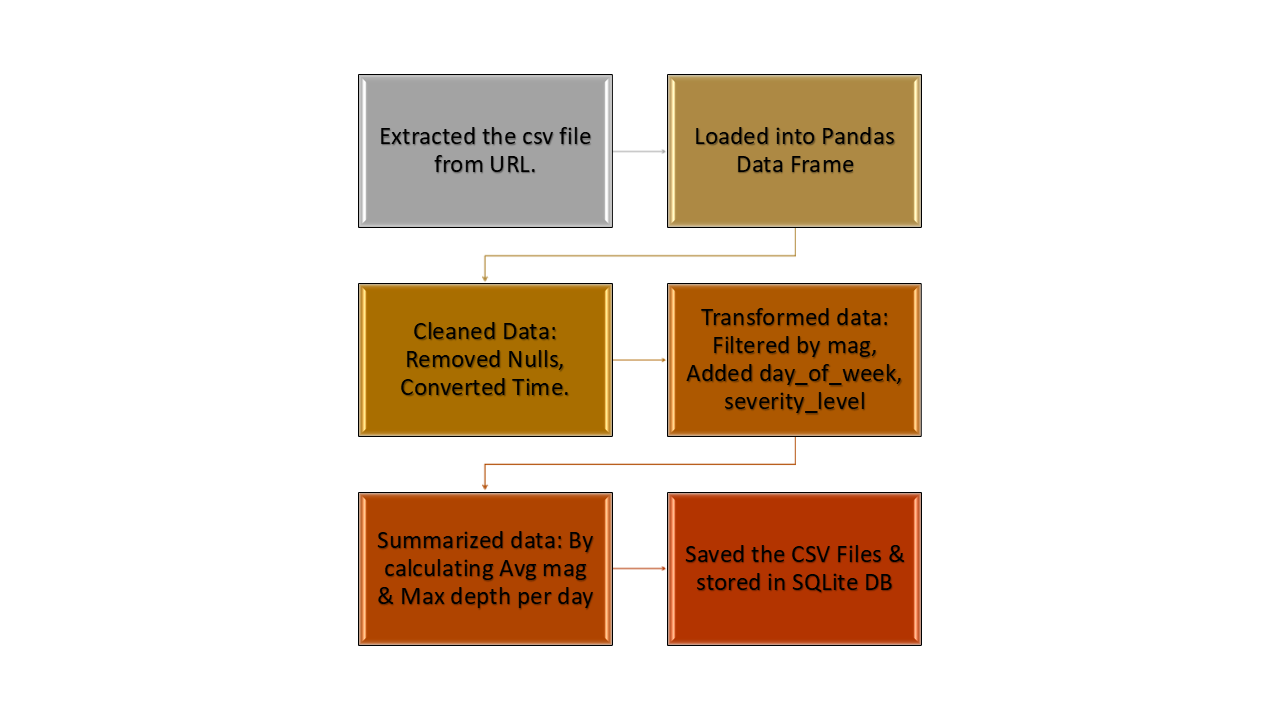

Raw earthquake data was extracted from the URL given using pandas. Time fields were converted and null values were cleaned. Only significant earthquakes (magnitude ≥ 4.0) were retained through filtering. New fields such as day of the week and severity level were added to enhance the dataset. Finally, daily statistics were summarized and the results were stored in CSV files and an SQLite database for future analysis.

In [44]:
# One insight - to find the place and time where the highest magnitude of earthquake took place in 2025 using sql query
q1=""" SELECT time,place,mag FROM earthquakes WHERE time LIKE "2025%" ORDER BY mag DESC LIMIT 1;"""
display(pd.read_sql(q1,conn))

,time,place,mag
0,2025-07-20 06:49:01.289000+00:00,"2025 Eastern Kamchatka, Russia Earthquake",7.4
